In [307]:
### The mission of this script is to :
### 1. Interpolate the missing data.
### 2. Applied Feature selection algorithms for reducing the input noise.

In [ ]:
import pandas as pd
import os.path

# Check if the file exists
os.path.isfile("beijing_17_18_aq.csv") 

True

In [309]:
beji_aqi_2018=pd.read_csv("beijing_201802_201803_aq.csv")
beji_aqi_2017_2018=pd.read_csv("beijing_17_18_aq.csv")
beji_aqi_summary=pd.concat([beji_aqi_2018,beji_aqi_2017_2018],axis=0).sort_values(by=['utc_time'])
beji_aqi_summary=beji_aqi_summary.set_index([list(range(0,len(beji_aqi_summary)))])
#beji_aqi_summary

In [310]:
import gc
import matplotlib.pyplot as plt

def DrawGraph(featureName,city):
    gc.collect()
    plt.clf()
    plt.figure(figsize=(20,10))
    plt.title(city,fontsize=18)
    temp_data=beji_aqi_summary.iloc[beji_aqi_summary.groupby(['stationId']).groups[city]]
    plt.plot(temp_data[featureName])
    plt.show()

In [311]:
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit

### Mission 1 : Missing Data Interpolation.

# Approach 1 : Guess Distribution Type
def DrawPredictedCurveFromGuess(featureName, city):
    
    # Convert data from pandas series to numpy
    temp_data=beji_aqi_summary.iloc[beji_aqi_summary.groupby(['stationId']).groups[city]]
    df = temp_data[featureName]
    xdata = np.array(df.index.values)
    ydata = np.array(df)
    print(city)

    # Distribution Type 
    idx = np.isfinite(xdata) & np.isfinite(ydata)
    coefficients = poly.polyfit(xdata[idx], ydata[idx], 10)
    xdata_rearranged = np.linspace(xdata[0], xdata[-1], num=len(xdata))
    ffit = poly.polyval(xdata_rearranged, coefficients)

    # Plot 
    plt.clf()
    plt.figure(figsize=(20,10))
    plt.title(city,fontsize=18)
    plt.plot(xdata_rearranged,temp_data[featureName],linewidth=1, label = 'Original Data')
    plt.plot(xdata_rearranged, ffit, linewidth=10, label = 'Predicted distribution')
    plt.legend(loc='upper right')
    plt.show()

# Generate Predicted Missing Data
# Question : What kind of noise ?

# Approach 2 : RandomForest Prediction
def DrawPredictedCurveFromRF(featureName, city):
    
    temp_data=beji_aqi_summary.iloc[beji_aqi_summary.groupby(['stationId']).groups[city]]
    df = temp_data[featureName]
    xdata = np.array(df.index.values)
    ydata = np.array(df)
    
    # Training Data Generation
    # Testing Data Generation
    # RandomForest Classifier
    # Cross Validation

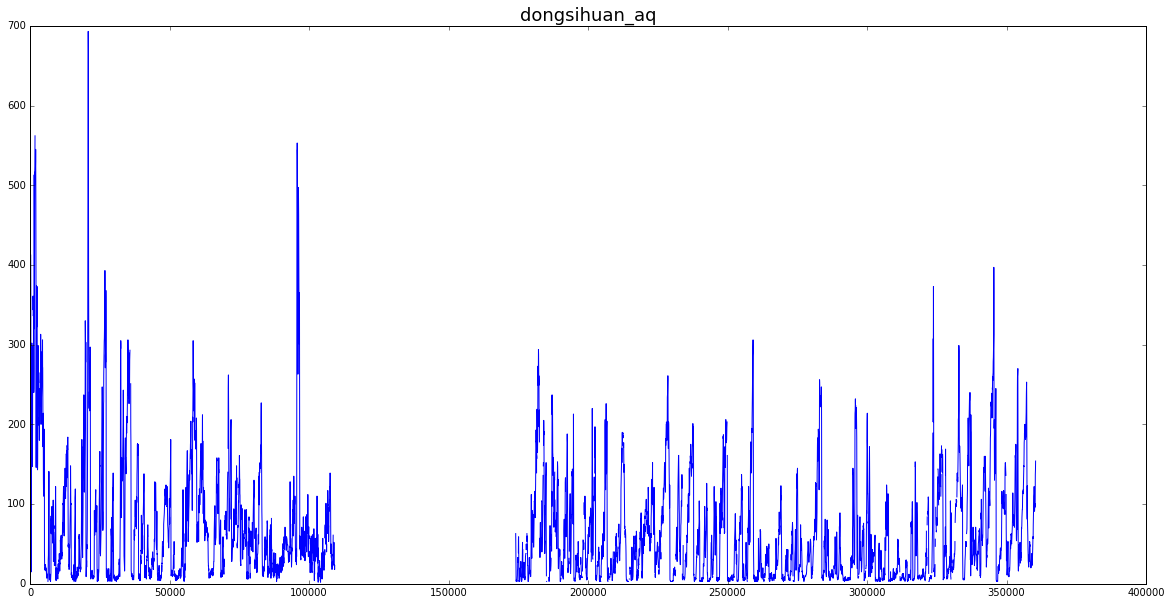

In [312]:
# PM 2.5 dongsihuan data    
DrawGraph('PM2.5','dongsihuan_aq')    

dongsihuan_aq


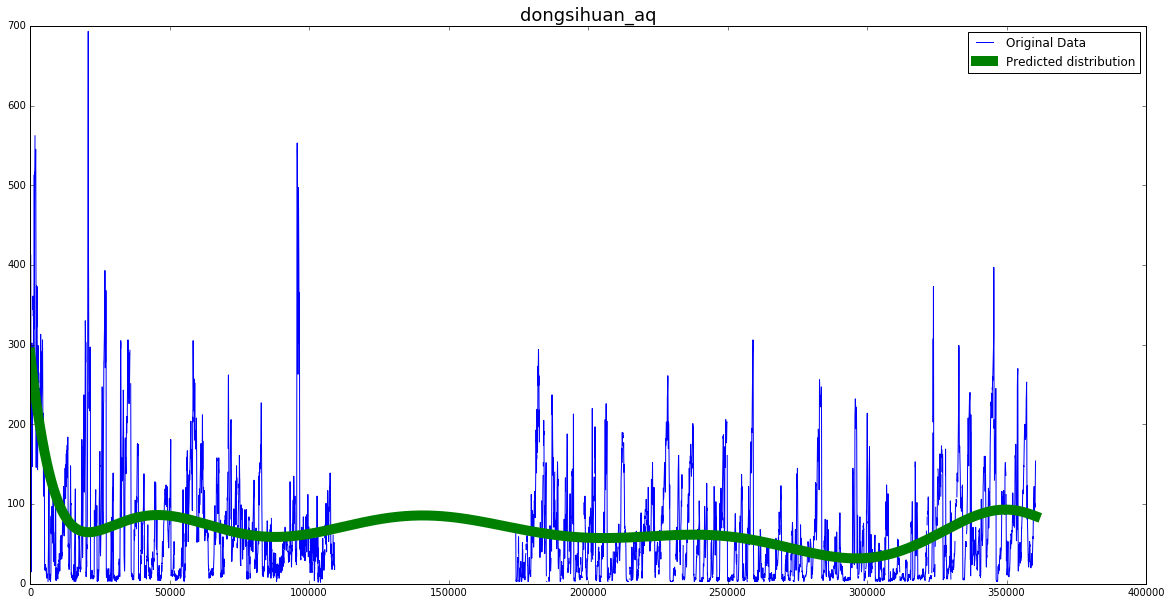

In [313]:
# PM 2.5 dongsihuan data fitting curve    
DrawPredictedCurveFromGuess('PM2.5', 'dongsihuan_aq')

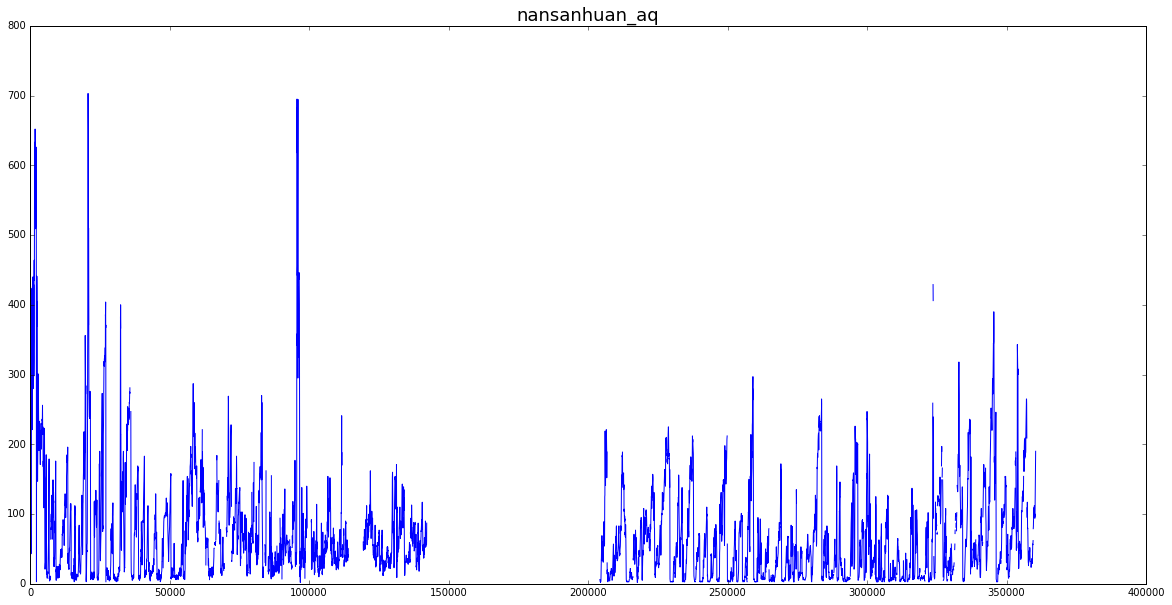

In [314]:
# PM 2.5 nansanhuan data    
DrawGraph('PM2.5','nansanhuan_aq')  

nansanhuan_aq


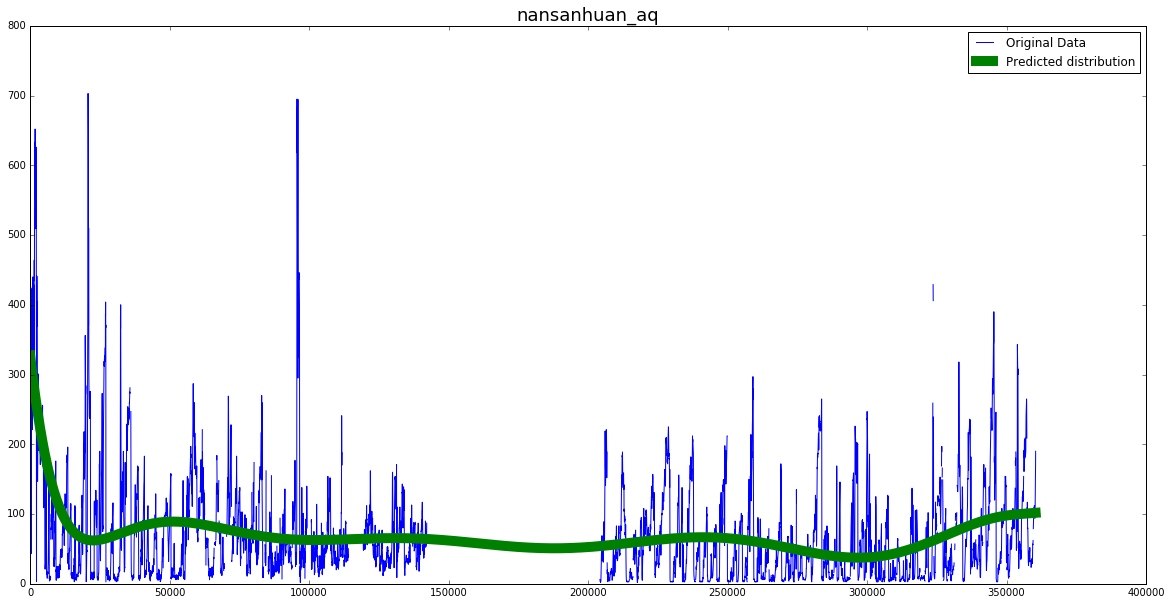

In [315]:
plt.clf()
# PM 2.5 nansanhuan data fitting curve    
DrawPredictedCurveFromGuess('PM2.5', 'nansanhuan_aq')